In [59]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Load the dataset from the correct file path
dataset = pd.read_csv('/kaggle/input/sentiment-analysis-dataset/combined_dataset.csv')


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-analysis-dataset/combined_dataset.csv


In [60]:
# General information about the dataset
print(dataset.info())

# Check for missing values
print(dataset.isnull().sum())

# Summary statistics for numerical and categorical columns
print(dataset.describe(include='all'))

# Shape of the dataset (rows, columns)
print("Shape:", dataset.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1675000 entries, 0 to 1674999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   text    1675000 non-null  object 
 1   label   1625000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 25.6+ MB
None
text         0
label    50000
dtype: int64
                             text      label
count                     1675000  1625000.0
unique                    1655523        NaN
top     isPlayer Has Died! Sorry         NaN
freq                          210        NaN
mean                          NaN        0.5
std                           NaN        0.5
min                           NaN        0.0
25%                           NaN        0.0
50%                           NaN        0.5
75%                           NaN        1.0
max                           NaN        1.0
Shape: (1675000, 2)


In [61]:
# Percentage of missing data per column
missing_data = dataset.isnull().mean() * 100
print("Missing Data (%):\n", missing_data)

# Drop rows with missing values (if necessary)
dataset_cleaned = dataset.dropna()
print("Shape after dropping missing values:", dataset_cleaned.shape)


Missing Data (%):
 text     0.000000
label    2.985075
dtype: float64
Shape after dropping missing values: (1625000, 2)


count    1.675000e+06
mean     1.302484e+02
std      3.371898e+02
min      6.000000e+00
25%      4.500000e+01
50%      7.200000e+01
75%      1.100000e+02
max      1.428200e+04
Name: text_length, dtype: float64


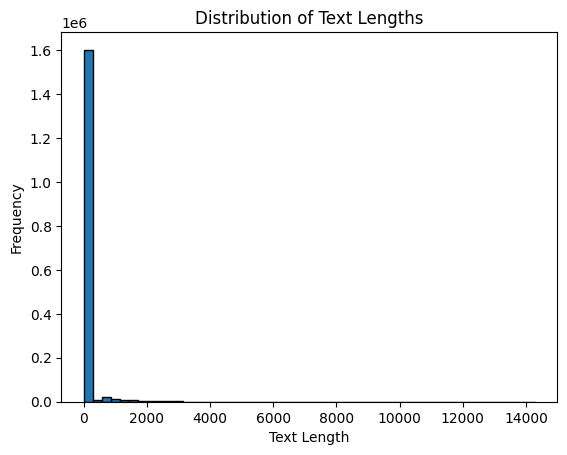

In [62]:
# Length of each text entry
dataset['text_length'] = dataset['text'].apply(len)

# Summary of text lengths
print(dataset['text_length'].describe())

# Plot histogram of text lengths
import matplotlib.pyplot as plt
plt.hist(dataset['text_length'], bins=50, edgecolor='black')
plt.title("Distribution of Text Lengths")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()


Label Distribution:
 label
1.0    812500
0.0    812500
Name: count, dtype: int64


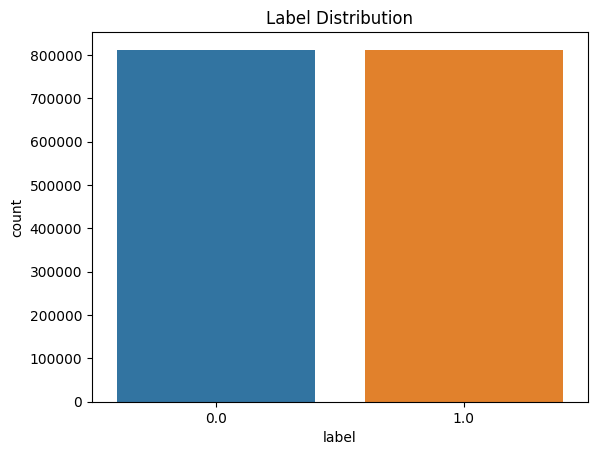

In [63]:
# Count of each label
label_counts = dataset['label'].value_counts()
print("Label Distribution:\n", label_counts)

# Visualize the label distribution
import seaborn as sns
sns.countplot(x='label', data=dataset)
plt.title("Label Distribution")
plt.show()


In [64]:
# Count duplicates in the 'text' column
duplicate_count = dataset['text'].duplicated().sum()
print("Number of duplicate text entries:", duplicate_count)

# Drop duplicates (if necessary)
dataset_unique = dataset.drop_duplicates(subset=['text'])
print("Shape after removing duplicates:", dataset_unique.shape)


Number of duplicate text entries: 19477
Shape after removing duplicates: (1655523, 3)


In [65]:
# View random samples of each sentiment, skipping NaN labels
for label in dataset['label'].dropna().unique():  # Exclude NaN labels
    print(f"Examples for label {label}:\n")
    try:
        print(dataset[dataset['label'] == label]['text'].sample(5).values)
    except ValueError:  # If there are fewer than 5 examples
        print("Not enough examples for this label.")

# Handle rows with NaN labels separately
if dataset['label'].isnull().any():
    print("\nExamples for label NaN:\n")
    try:
        print(dataset[dataset['label'].isnull()]['text'].sample(5).values)
    except ValueError:  # If there are fewer than 5 rows with NaN labels
        print("Not enough examples with NaN labels.")



Examples for label 1.0:

['@hojomo He most certainly is  '
 '@KrisAllenmusic Hi Kris!!! Hope you do come and perform here. We love you here!!! '
 '@Tori_Thompson Did you say something about drinking?  '
 'is going to bed!!! '
 "New moon trailer, so good! Kristen can't act, Jacob's hot  http://bit.ly/XVoS"]
Examples for label 0.0:

['@RonisWeigh ahh!! your doing a FULL ONE!! that is my DREAM!  its not till the fall out in sandey eggo  that would be so cool to run w/you!'
 'but unfortunately i still have to work...yuckky......lets see if i have the guts to quit tonight...bet i dont  im soo lame'
 'Air France missing over the atlantic  http://bit.ly/9CzGJ '
 "@hanspam http://twitpic.com/7m20c - Oh i love you all  wish i could of been there  can't wait for us to all go out so southport some ..."
 "@DarkGX YUP   and i'm quickly losing my focus so i'm not even multitasking lol"]

Examples for label NaN:

["3 stars out of 10 was the best I could do for this film.<br /><br />It started out rat

In [66]:
from collections import Counter

# Tokenize words and count frequencies
all_words = ' '.join(dataset['text'].dropna()).lower()  # Combine all text and convert to lowercase
word_tokens = all_words.split()  # Tokenize words using split()
word_counts = Counter(word_tokens)  # Count word frequencies

# Top 10 most common words
print("Top 10 most common words:")
print(word_counts.most_common(10))


Top 10 most common words:
[('the', 1489505), ('to', 962193), ('i', 954101), ('a', 858016), ('and', 773529), ('of', 618281), ('is', 543530), ('in', 482163), ('it', 386494), ('my', 347089)]


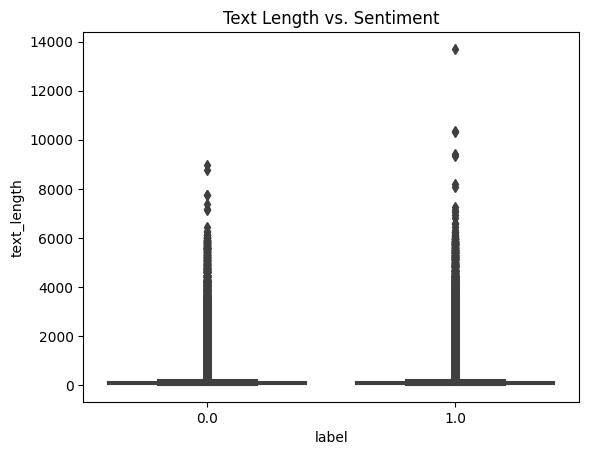

In [67]:
# Plot correlation between text length and labels
sns.boxplot(x='label', y='text_length', data=dataset)
plt.title("Text Length vs. Sentiment")
plt.show()


In [68]:
# Save the dataset description to a text file
with open("dataset_report.txt", "w") as f:
    f.write(str(dataset.describe(include='all')))
    f.write("\n\nMissing Data:\n")
    f.write(str(dataset.isnull().sum()))
    f.write("\n\nLabel Distribution:\n")
    f.write(str(dataset['label'].value_counts()))


In [69]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

# Load and preprocess the dataset
def preprocess_data(input_file, output_file, cleansed_csv, raw_text_file):
    # Load dataset
    dataset = pd.read_csv(input_file)

    # Drop rows with missing labels
    dataset = dataset.dropna(subset=['label'])

    X_raw = dataset['text']

    # Clean text
    def clean_text(text):
        text = re.sub(r'[^a-zA-Z\s]', '', text.lower())  # Remove special characters and lowercase
        return text

    dataset['clean_text'] = dataset['text'].apply(clean_text)

    # Save the cleansed dataset to a CSV file
    dataset.to_csv(cleansed_csv, index=False)
    print(f"Cleansed dataset saved to {cleansed_csv}")

    # Prepare features and labels
    X = dataset['clean_text']
    y = dataset['label']

    # Convert text to TF-IDF features
    vectorizer = TfidfVectorizer(max_features=5000)
    X_tfidf = vectorizer.fit_transform(X)

    # Save the preprocessed data, raw text, and vectorizer
    with open(output_file, 'wb') as f:
        pickle.dump((X_tfidf, y, vectorizer), f)

    with open(raw_text_file, 'wb') as f:
        pickle.dump(X_raw, f)

    print(f"Preprocessed data saved to {output_file}")
    print(f"Raw text data saved to {raw_text_file}")

# Specify input, output, cleansed CSV, and raw text file paths
input_file = '/kaggle/input/sentiment-analysis-dataset/combined_dataset.csv'  # Ensure this is the correct file path
output_file = '/kaggle/working/preprocessed_data.pkl'
cleansed_csv = '/kaggle/working/cleansed_dataset.csv'
raw_text_file = '/kaggle/working/raw_text.pkl'  # Define the raw text file path

# Call the function with all arguments
preprocess_data(input_file, output_file, cleansed_csv, raw_text_file)


Cleansed dataset saved to /kaggle/working/cleansed_dataset.csv
Preprocessed data saved to /kaggle/working/preprocessed_data.pkl
Raw text data saved to /kaggle/working/raw_text.pkl


In [70]:
import pickle

# Load preprocessed data
with open('/kaggle/working/preprocessed_data.pkl', 'rb') as f:
    X_tfidf, y, vectorizer = pickle.load(f)

print("Preprocessed data loaded successfully!")


Preprocessed data loaded successfully!


In [71]:

import pickle
from sklearn.model_selection import train_test_split

# Load preprocessed data
with open('preprocessed_data.pkl', 'rb') as f:
    X_tfidf, y, vectorizer = pickle.load(f)

# Load raw text
with open('raw_text.pkl', 'rb') as f:
    X_raw = pickle.load(f)

# Split both raw and processed data
X_train_raw, X_test_raw, X_train, X_test, y_train, y_test = train_test_split(
    X_raw, X_tfidf, y, test_size=0.2, random_state=42
)



In [72]:
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression model
model = LogisticRegression(max_iter=500)  # Increase max_iter
model.fit(X_train, y_train)

print("Model training completed!")



Model training completed!


In [73]:
from sklearn.metrics import classification_report, accuracy_score

# Predict on training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Accuracy
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))

# Classification report
print("\nClassification Report (Testing Set):\n")
print(classification_report(y_test, y_test_pred))


Training Accuracy: 0.7911592307692308
Testing Accuracy: 0.790923076923077

Classification Report (Testing Set):

              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79    162110
         1.0       0.78      0.80      0.79    162890

    accuracy                           0.79    325000
   macro avg       0.79      0.79      0.79    325000
weighted avg       0.79      0.79      0.79    325000



In [74]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Train an XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_test_pred = xgb_model.predict(X_test)
print("\nXGBoost Performance:\n")
print(classification_report(y_test, y_test_pred))



XGBoost Performance:

              precision    recall  f1-score   support

         0.0       0.79      0.71      0.75    162110
         1.0       0.74      0.81      0.77    162890

    accuracy                           0.76    325000
   macro avg       0.76      0.76      0.76    325000
weighted avg       0.76      0.76      0.76    325000



In [75]:
from lightgbm import LGBMClassifier

# Train a LightGBM model
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)

# Predict and evaluate
y_test_pred = lgbm_model.predict(X_test)
print("\nLightGBM Performance:\n")
print(classification_report(y_test, y_test_pred))


[LightGBM] [Info] Number of positive: 649610, number of negative: 650390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 60.153180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 323864
[LightGBM] [Info] Number of data points in the train set: 1300000, number of used features: 5000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499700 -> initscore=-0.001200
[LightGBM] [Info] Start training from score -0.001200

LightGBM Performance:

              precision    recall  f1-score   support

         0.0       0.78      0.72      0.75    162110
         1.0       0.74      0.80      0.77    162890

    accuracy                           0.76    325000
   macro avg       0.76      0.76      0.76    325000
weighted avg       0.76      0.76      0.76    325000



In [76]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report


In [77]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=500, random_state=42)

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# LightGBM
lgbm_model = LGBMClassifier(random_state=42)


In [78]:
# Combine models into a Voting Classifier
voting_model = VotingClassifier(
    estimators=[
        ('log_reg', log_reg),
        ('xgb', xgb_model),
        ('lgbm', lgbm_model)
    ],
    voting='soft'  # Soft voting uses predicted probabilities
)


In [79]:
import pandas as pd

# Load the cleansed dataset
cleansed_dataset = pd.read_csv('cleansed_dataset.csv')

# Check if columns exist
print(cleansed_dataset.columns)

# Assign X and y
X = cleansed_dataset['text']  # Replace 'text' with the column name for your text data
y = cleansed_dataset['label']  # Replace 'label' with the column name for your labels


Index(['text', 'label', 'clean_text'], dtype='object')


In [80]:
print(f"Length of X: {len(X)}")
print(f"Length of y: {len(y)}")


Length of X: 1625000
Length of y: 1625000


In [81]:
# Drop rows with missing values in either text or label
cleansed_dataset = cleansed_dataset.dropna(subset=['text', 'label'])

# Reassign X and y
X = cleansed_dataset['text']
y = cleansed_dataset['label']

# Confirm consistent lengths
print(f"Length of X after cleaning: {len(X)}")
print(f"Length of y after cleaning: {len(y)}")


Length of X after cleaning: 1625000
Length of y after cleaning: 1625000


In [82]:
import pickle

with open('preprocessed_data.pkl', 'rb') as f:
    X_tfidf, y, vectorizer = pickle.load(f)

print(f"Shape of X_tfidf: {X_tfidf.shape}")
print(f"Length of y: {len(y)}")


Shape of X_tfidf: (1625000, 5000)
Length of y: 1625000


In [84]:
# Train the Voting Classifier
voting_model.fit(X_train, y_train)

# Evaluate the model
y_test_pred = voting_model.predict(X_test)

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))


[LightGBM] [Info] Number of positive: 649610, number of negative: 650390
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 64.782485 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 323864
[LightGBM] [Info] Number of data points in the train set: 1300000, number of used features: 5000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499700 -> initscore=-0.001200
[LightGBM] [Info] Start training from score -0.001200
              precision    recall  f1-score   support

         0.0       0.80      0.76      0.78    162110
         1.0       0.78      0.81      0.79    162890

    accuracy                           0.79    325000
   macro avg       0.79      0.79      0.79    325000
weighted avg       0.79      0.79      0.79    325000



In [85]:
import pickle

# Save the trained voting classifier model
with open('voting_model.pkl', 'wb') as f:
    pickle.dump(voting_model, f)

print("Voting model saved to 'voting_model.pkl'")


Voting model saved to 'voting_model.pkl'


In [86]:
# Load the saved model
with open('voting_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Predict using the loaded model
y_loaded_pred = loaded_model.predict(X_test)

# Evaluate the loaded model
from sklearn.metrics import classification_report
print("Classification Report for Loaded Model:")
print(classification_report(y_test, y_loaded_pred))


Classification Report for Loaded Model:
              precision    recall  f1-score   support

         0.0       0.80      0.76      0.78    162110
         1.0       0.78      0.81      0.79    162890

    accuracy                           0.79    325000
   macro avg       0.79      0.79      0.79    325000
weighted avg       0.79      0.79      0.79    325000



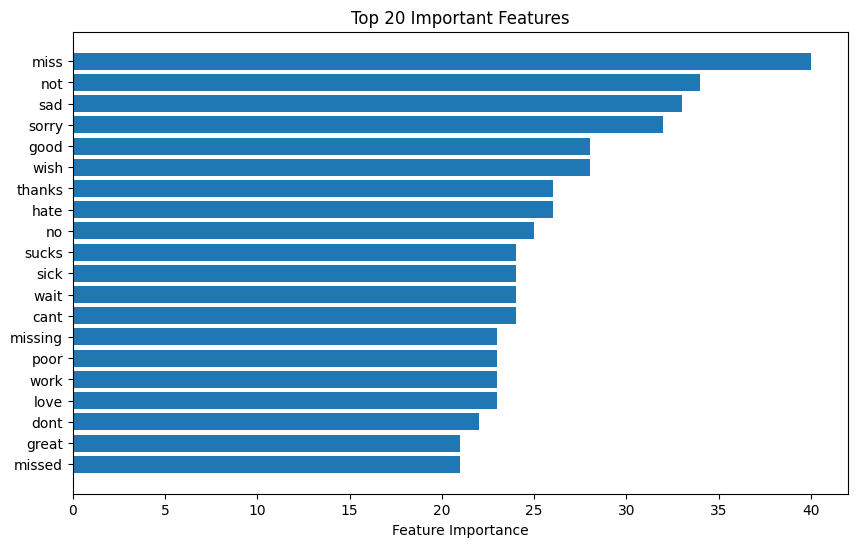

In [87]:
import matplotlib.pyplot as plt
import lightgbm as lgb

# Get feature importance from LightGBM
lgb_model = voting_model.estimators_[2]  # Assuming LightGBM is part of your ensemble
importance = lgb_model.feature_importances_
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Plot top 20 features
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:20], importance_df['Importance'][:20])
plt.xlabel("Feature Importance")
plt.title("Top 20 Important Features")
plt.gca().invert_yaxis()
plt.show()


In [88]:
# Predict on test set
y_test_pred = loaded_model.predict(X_test)

# Identify misclassified indices
misclassified_indices = (y_test != y_test_pred)

# Extract misclassified raw texts and their labels
misclassified_texts = X_test_raw[misclassified_indices]
misclassified_actual = y_test[misclassified_indices]
misclassified_predicted = y_test_pred[misclassified_indices]

# Display a few misclassified examples
for i in range(min(5, len(misclassified_texts))):
    print(f"Text: {misclassified_texts.iloc[i]}")
    print(f"Actual: {misclassified_actual.iloc[i]}, Predicted: {misclassified_predicted[i]}")
    print("------")


Text: @WheatysGirl got into trouble from gil for it 
Actual: 0.0, Predicted: 1.0
------
Text: @nextread Oops, thought it was longer :s 450 pages isn't too bad, but I'll get some 300 pagers out of way the first 
Actual: 1.0, Predicted: 0.0
------
Text: WAITEN FOR MY BABII TO CALL MII 
Actual: 0.0, Predicted: 1.0
------
Text: Could not understand why Jeremy Irons felt it necessary to exhibit a most disconcerting accent, spoken through clenched teeth,and from the back of his throat. In fact it rather spoiled the film for me, and distracted from what was probably a fine performance by him (very irritating). No other actor or actress seemed to have such a pronounced accent and whilst I have always rated Jeremy Irons as a fine actor, I would not class this film as being one of his best. The film however has whetted my appetite, as have some of the other comments made re this film, which I have found very interesting,and intend to now read the book.
Actual: 1.0, Predicted: 0.0
------
Text: Tw